In [248]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, roc_curve, auc, recall_score
from sklearn import preprocessing
from sklearn.datasets import load_iris

In [149]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 
HTML(style)

## Titanic
### ROC curve

In [47]:
titanic = pd.read_csv("./titanic.csv")

In [48]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
X = titanic.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'Survived'], axis = 1)

In [85]:
X.Age = X.Age.fillna(X.Age.median())

In [86]:
X = pd.get_dummies(X)
X = X.drop('Sex_male', axis=1)

In [87]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female
0,1,3,22.0,1,0,7.2500,0
1,2,1,38.0,1,0,71.2833,1
2,3,3,26.0,0,0,7.9250,1
3,4,1,35.0,1,0,53.1000,1
4,5,3,35.0,0,0,8.0500,0


In [89]:
y = titanic['Survived']

In [107]:
clf = tree.DecisionTreeClassifier(random_state = 42, max_depth = 5)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.66)

In [109]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [110]:
predictions = clf.predict(X_test)

In [117]:
y_predicted_prob = clf.predict_proba(X_test)

In [112]:
precision = precision_score(y_test, predictions)

In [113]:
recall = recall_score(y_test, predictions)

In [114]:
precision

0.7708333333333334

In [115]:
recall

0.6166666666666667

In [118]:
y_predicted_prob

array([[0.4375    , 0.5625    ],
       [0.        , 1.        ],
       [0.53846154, 0.46153846],
       [0.8778626 , 0.1221374 ],
       [0.53846154, 0.46153846],
       [0.19354839, 0.80645161],
       [0.8778626 , 0.1221374 ],
       [0.8778626 , 0.1221374 ],
       [0.60606061, 0.39393939],
       [0.88888889, 0.11111111],
       [0.        , 1.        ],
       [0.8778626 , 0.1221374 ],
       [0.8778626 , 0.1221374 ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.8778626 , 0.1221374 ],
       [0.8778626 , 0.1221374 ],
       [0.8778626 , 0.1221374 ],
       [0.8778626 , 0.1221374 ],
       [0.19354839, 0.80645161],
       [0.8778626 , 0.1221374 ],
       [0.        , 1.        ],
       [0.60606061, 0.39393939],
       [0.19354839, 0.80645161],
       [0.19354839, 0.80645161],
       [0.8778626 , 0.1221374 ],
       [0.53846154, 0.46153846],
       [0.19354839, 0.80645161],
       [0.60606061, 0.39393939],
       [0.

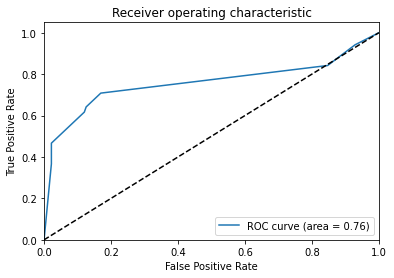

In [116]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1] , 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

### 2.7

In [119]:
xydata = pd.read_csv("train_data_tree_2.7.csv")

In [122]:
xydata.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [126]:
X = xydata.drop(['num'], axis =1)
y = xydata.num

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [140]:
clf = tree.DecisionTreeClassifier(random_state = 42, criterion = 'entropy')

In [141]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [142]:
predictions = clf.predict(X_test)

In [143]:
precision = precision_score(y_test, predictions)

In [144]:
recall = recall_score(y_test, predictions)

In [145]:
precision

0.8

In [146]:
recall

0.6956521739130435

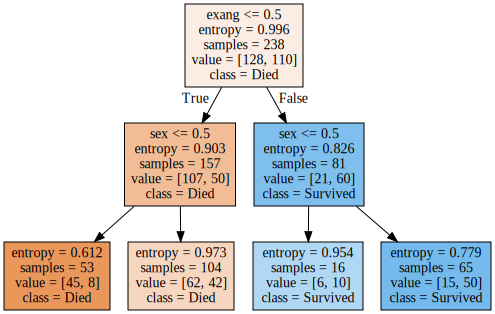

In [204]:
clf.fit(X,y)
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X)
                                    , class_names=['Died', 'Survived']
                                    , filled=True))
display(SVG(graph.pipe(format='svg')))

In [213]:
# from the tree
np.round(0.996 - (157/238)*0.903 - (81/238)*0.826, 3)

0.119

In [205]:
parent_node = np.round(-(128/238)*np.log2((128/238)) - (110/238)*np.log2((110/238)), 3)

In [206]:
parent_node

0.996

In [207]:
e1 = np.round(-(107/157)*np.log2((107/157)) - (50/157)*np.log2((50/157)), 3)

In [209]:
e2 = np.round(-(21/81)*np.log2((21/81)) - (60/81)*np.log2((60/81)), 3)

In [208]:
e1

0.903

In [210]:
e2

0.826

In [211]:
np.round(parent_node - (157/238)*e1 - (81/238)*e2, 3)

0.119

## Iris

In [215]:
iris = load_iris()

In [216]:
X = iris.data
y = iris.target

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)

In [224]:
predicted.shape

(38,)

In [227]:
precision = precision_score(y_test, predicted, average = 'micro')

In [231]:
precision

0.9473684210526315

In [233]:
recall = recall_score(y_test, predicted, average = 'micro')

In [234]:
recall

0.9473684210526315

In [249]:
#search = GridSearchCV(dt, {'max_depth':range(1,10),'min_samples_split':range(2,10), 'min_samples_leaf':range(1,10)})
search = RandomizedSearchCV(dt, {'max_depth':range(1,10),'min_samples_split':range(2,10), 'min_samples_leaf':range(1,10)})

In [250]:
search.fit(X,y)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': range(1, 10),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10)})

In [251]:
best_tree = search.best_estimator_

In [252]:
best_tree

DecisionTreeClassifier(max_depth=4, min_samples_split=3)